In [1]:
import pandas as pd
import mplh.color_utils as cu
import mplh.cluster_help as ch
import seaborn as sns
%matplotlib inline

fig_utils from mplh
here


In [2]:
%load_ext autoreload
%autoreload 2
#%matplotlib notebook


## Tutorial data

In [3]:
data_df = pd.read_csv("../tests/test1/data.csv", index_col=0)
data_df.head()


,10397G,10463C,10559G,10589A,11251G,11453A,11719A,11761T,11812G,13188T,...,750G,7598A,827G,8292A,8461T,8697A,8743A,8860G,930A,9899C
lineage,,,,,,,,,,,,,,,,,,,,,
0,0.995444,0.000628,0.003580,0.990101,0.003609,0.004726,0.003032,0.992574,0.001601,0.993744,...,0.999103,0.989724,0.993709,0.991904,0.992580,0.001703,0.004661,0.997145,0.002019,0.002217
1,0.996273,0.000568,0.001738,0.995195,0.001388,0.000990,0.000116,0.998072,0.000266,0.994378,...,0.994930,0.986744,0.993615,0.995766,0.995115,0.000143,0.002477,0.999792,0.000289,0.000931
2,0.986099,0.004710,0.019550,0.970857,0.026830,0.007621,0.011073,0.958204,0.006407,0.985260,...,0.997232,0.946922,0.981212,0.984884,0.979459,0.004978,0.001263,0.993893,0.019970,0.011858
3,0.890059,0.006662,0.004837,0.925492,0.011645,0.021552,0.008663,0.956061,0.010676,0.965825,...,0.980180,0.918694,0.940203,0.954388,0.934242,0.015301,0.003766,0.976745,0.004904,0.009216
4,0.990567,0.001525,0.008019,0.987270,0.002044,0.038843,0.035635,0.973005,0.005221,0.983964,...,0.993168,0.971835,0.977714,0.986797,0.979409,0.003078,0.000187,0.999030,0.031729,0.004321


In [4]:
meta_df = pd.read_csv("../tests/test1/metadata.csv", index_col=0)
meta_df

,donor,size,log2_fold,-log10(fold p_adj),shuffle_sig,ncells
lineage,,,,,,
0,0,437,-0.476051,12.121634,True,419.0
1,0,432,-0.623482,19.018728,True,425.0
2,0,397,0.159693,9.309595,True,399.0
3,0,354,1.018686,30.674267,True,357.0
4,0,314,-0.279499,0.233365,False,307.0
5,0,314,-0.613802,17.916934,True,313.0
6,0,312,-0.446670,4.733007,True,319.0
7,0,302,-0.136986,0.269548,False,309.0
8,0,292,-0.316820,1.179727,False,290.0


sequential True
loc keys [1.0]
saving


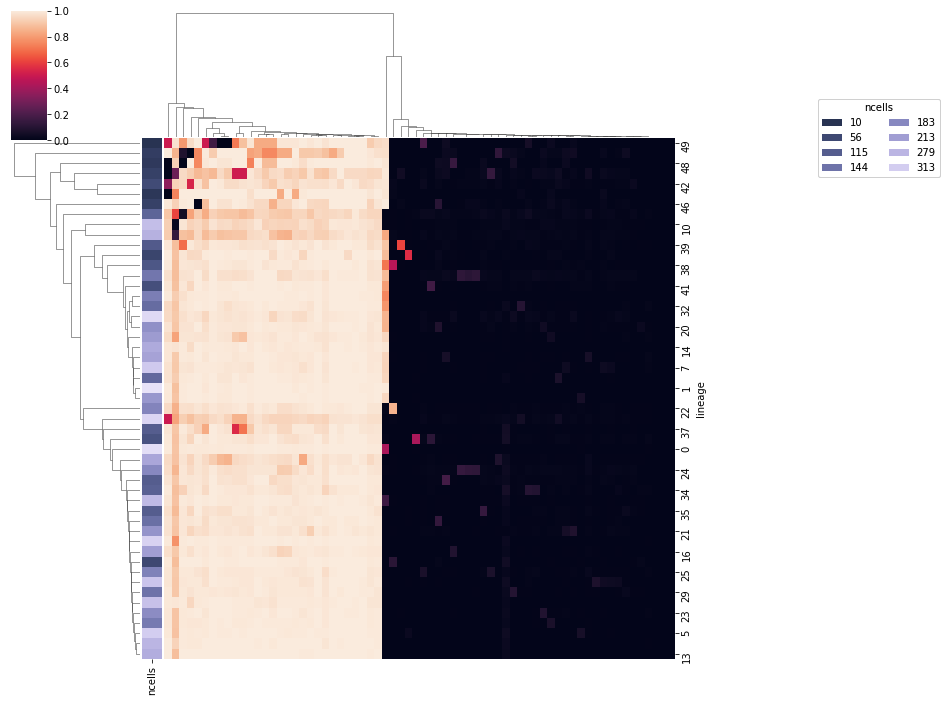

In [5]:
ch.plot_cluster(df=data_df, row_meta=meta_df[["ncells"]], col_meta=None,
             fsave=None, to_z=False, to_col_clust=True,
             to_row_clust=True, name=None, col_names=False,
             row_names=True, to_legend=True, 
             method="average", white_name="WT",  sep_clr_map=False,
             row_clr_schemes='sequential')

{'ncells': 'sequential', 'log2_fold': 'divergent', 'donor': 'categorical'} False
loc keys [1.0, 0.6666666666666667, 0.33333333333333337]
saving


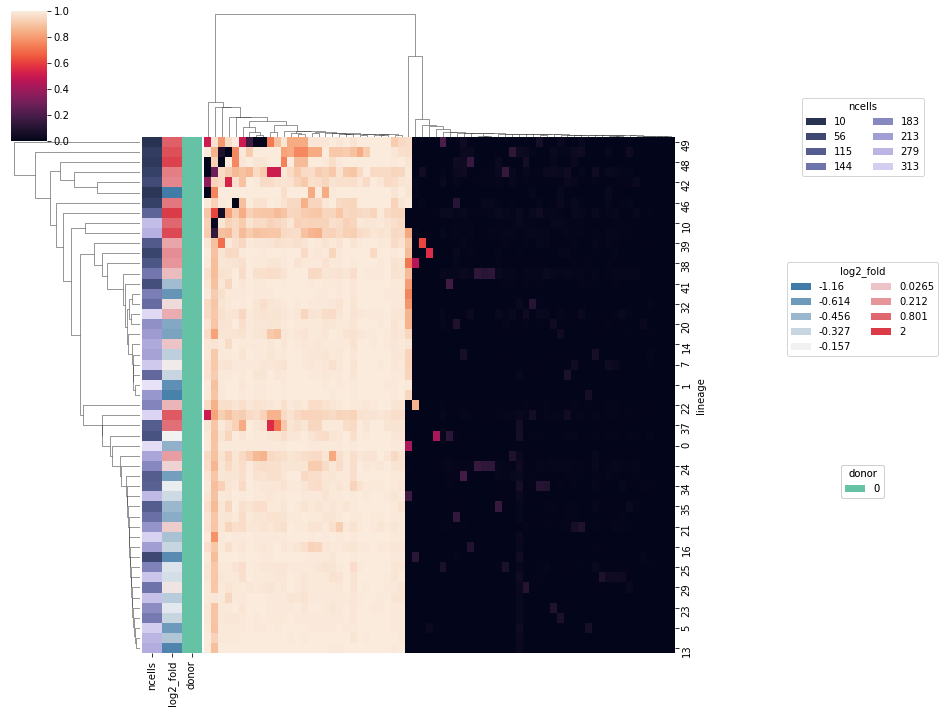

In [6]:
g = ch.plot_cluster(df=data_df, row_meta=meta_df[["ncells", "log2_fold", "donor"]],
                 fsave=None, to_z=False, to_col_clust=True,
                 to_row_clust=True, name=None, col_names=False,
                 row_names=True, to_legend=True, 
                 method="average", white_name="WT", cmap=None, sep_clr_map=False,
                 row_clr_schemes={"ncells": 'sequential', "log2_fold": "divergent",  
                                  "donor":"categorical"}
                   )

## Add fake column and use that as meta

In [7]:
col_meta = pd.DataFrame(index=data_df.columns )
col_meta["first_20"] = 0
col_meta.loc[:20] = 1
col_meta

/tmp/ipykernel_1331889/2202197146.py:3: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  col_meta.loc[:20] = 1


,first_20
10397G,1
10463C,1
10559G,1
10589A,1
11251G,1
...,...
8697A,0
8743A,0
8860G,0
930A,0


categorical True
{'ncells': 'sequential', 'log2_fold': 'divergent', 'donor': 'categorical'} False
loc keys [1.0]
loc keys [1.0, 0.6666666666666667, 0.33333333333333337]
saving


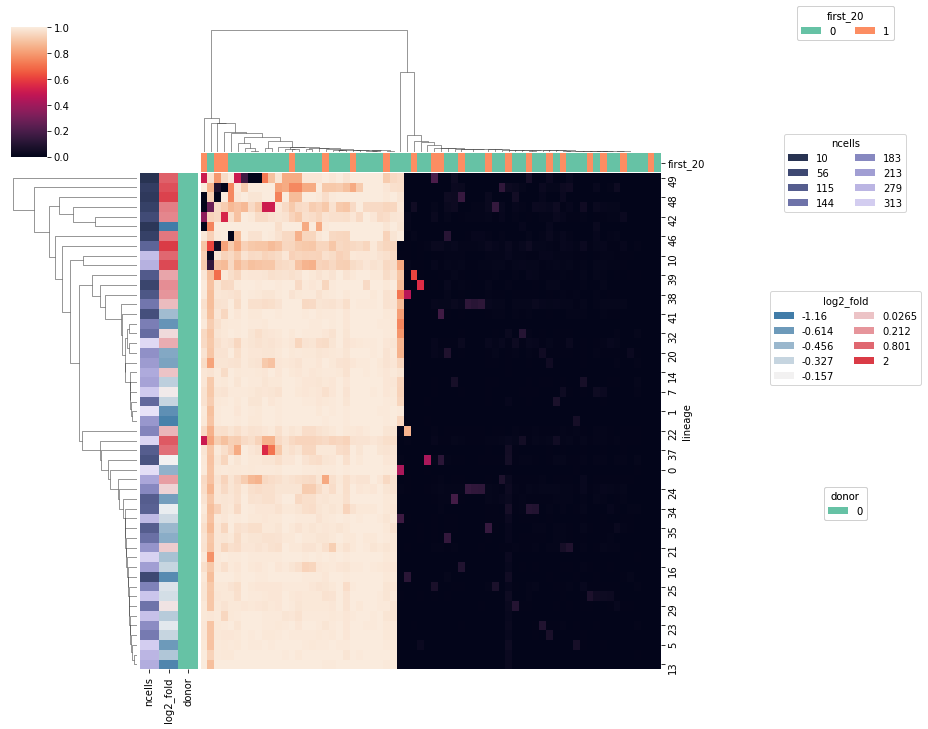

In [8]:
g = ch.plot_cluster(df=data_df, row_meta=meta_df[["ncells", "log2_fold", "donor"]], col_meta=col_meta,
                 fsave=None, to_z=False, to_col_clust=True,
                 to_row_clust=True, name=None, col_names=False,
                 row_names=True, to_legend=True, 
                 method="average", white_name="WT", cmap=None, sep_clr_map=False,
                 row_clr_schemes={"ncells": 'sequential', "log2_fold": "divergent",  
                                  "donor":"categorical"},
                 col_clr_schemes="categorical")